In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk

In [2]:
dev = pd.read_csv('development.csv')

In [32]:
import re
from nltk.stem.snowball import SnowballStemmer
def PreProcess(sentence):
    sentence = sentence.lower()
    #Remove Special characters
    sentence = re.sub("`!@#$%^&*()_+-\{}|;'':,./<>?", " ", sentence)
    #Remove digits
    sentence = re.sub("(\\d|\\W)+", " ", sentence)
    #Remove single characters
    sentence = re.sub(r"\b[a-z]\b", "", sentence)
    #https://www.datacamp.com/community/tutorials/stemming-lemmatization-python
    stemmer=SnowballStemmer("italian")
    sentence = stemmer.stem(sentence)
    return sentence

In [71]:
#Could add a column as dev['cleaned']
sentences = []
for index, row in dev.iterrows():
    temp = [PreProcess(row[0]), 1 if row[1] == 'pos' else 0]
    sentences.append(temp[0])
dev['clean'] = sentences

In [ ]:
counter_pre = []
words_pre = {}
for s in sentences:
    counter_pre.append(len(s[0].split()))
    for w in s[0].split():
        if w not in words_pre:
            words_pre[w] = 1
        words_pre[w] = words_pre[w] + 1

In [5]:
counter = []
words = {}
for index, row in dev.iterrows():
    counter.append(len(row[0].split()))
    for w in row[0].split():
        if w not in words:
            words[w] = 1
        words[w] = words[w] + 1

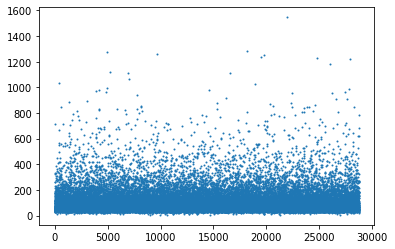

In [6]:
plt.scatter(range(0,len(counter)),counter,s=1)

(array([2.3156e+04, 4.3430e+03, 8.5400e+02, 2.3700e+02, 1.0000e+02,
        3.9000e+01, 1.3000e+01, 6.0000e+00, 5.0000e+00, 1.0000e+00]),
 array([   5. ,  159.1,  313.2,  467.3,  621.4,  775.5,  929.6, 1083.7,
        1237.8, 1391.9, 1546. ]),
 <a list of 10 Patch objects>)

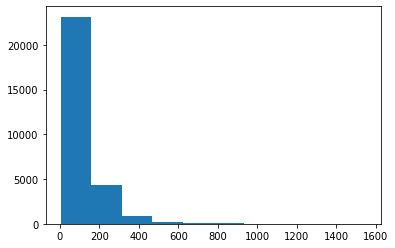

In [7]:
plt.hist(counter)

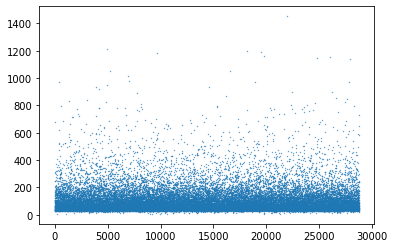

In [8]:
plt.scatter(range(0,len(counter_pre)),counter_pre,s=.1)

(array([2.3233e+04, 4.2650e+03, 8.5500e+02, 2.3900e+02, 9.8000e+01,
        4.1000e+01, 1.2000e+01, 6.0000e+00, 4.0000e+00, 1.0000e+00]),
 array([   6. ,  150.6,  295.2,  439.8,  584.4,  729. ,  873.6, 1018.2,
        1162.8, 1307.4, 1452. ]),
 <a list of 10 Patch objects>)

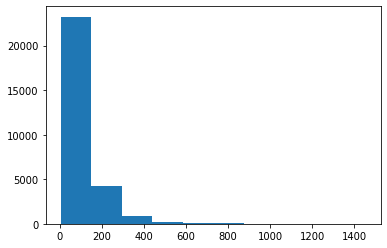

In [9]:
plt.hist(counter_pre)

In [10]:
print(len(words))
#words
#for k,v in words.items():
#    if(len(k)==22):
#        print(f"{k} {v}")

153276


In [34]:
print(len(words_pre))
#words_pre
#for k,v in words_pre.items():
#    if(len(k)==1):
#        print(f"{k} {v}")

53678


In [12]:
p = 0
n = 0
for i in (sentences):
    if i[1] == 1:
        p  = p + 1
    else:
        n = n + 1
print(f'Positive {p} Negative {n}')

Positive 19532 Negative 9222


In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dev.iloc[:,2],dev.iloc[:,1],test_size=0.2)

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords as sw
stop_words = sw.words('italian')+['']

#Create a vocabulary of words
cv = CountVectorizer(max_df=.85,stop_words=stop_words,max_features=len(words_pre))
word_count_vector = cv.fit_transform(dev.iloc[:,2])

In [36]:
print(len(cv.vocabulary_.keys()))
for i in list(cv.vocabulary_.keys())[:10]:
    print(f'{i} -> {words_pre[i]}')

53401
hotel -> 37675
lussuoso -> 154
mai -> 3462
soggiornato -> 4130
esperienza -> 2166
complessiva -> 66
prima -> 5860
classe -> 388
direttamente -> 929
accoglienza -> 1221


In [39]:
from sklearn.feature_extraction .text import TfidfTransformer

#tfidf_transformer = TfidfTransformer(smooth_idf=True,use_idf=True)
#tfidf_transformer.fit(word_count_vector)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=.85,stop_words=stop_words,max_features=len(words_pre))
X_tfidf = vectorizer.fit_transform(docs)

In [73]:
tfidf_vect_ngram = TfidfVectorizer(lowercase=False, ngram_range=(1,2), max_features=len(words_pre))
tfidf_vect_ngram.fit(dev['clean'])

xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(X_train)
ytrain_tfidf_ngram =  tfidf_vect_ngram.transform(y_train)

In [52]:
from sklearn.decomposition import TruncatedSVD
import numpy as np

svd = TruncatedSVD(n_components=3000,random_state=42)
X_svd = svd.fit_transform(X_tfidf)

print(f"Total variance explained: {np.sum(svd.explained_variance_ratio_):.3f}")

KeyboardInterrupt: 

In [77]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    return metrics.accuracy_score(predictions, valid_y)

In [ ]:
from sklearn.svm import SVC
# SVM on Ngram Level TF IDF Vectors
accuracy = train_model(SVC(), xtrain_tfidf_ngram, y_train, ytrain_tfidf_ngram)
print("SVM, N-Gram Vectors: ", accuracy)

C:\Users\mauri\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
